In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import quantities as pq

from generate_sample_data import generate_time_array, generate_ripple, generate_single_fake_data

%matplotlib inline

In [9]:
t, x, y = generate_single_fake_data()

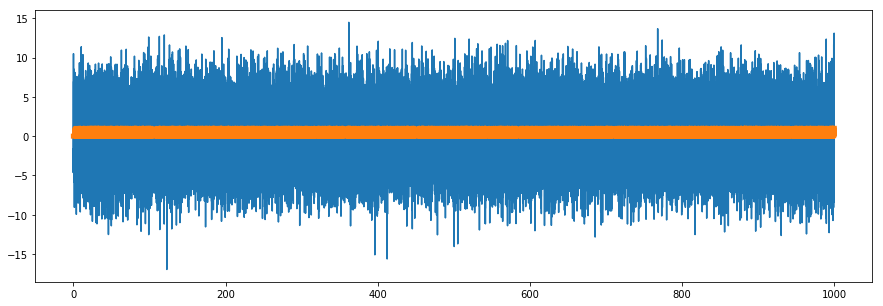

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(t, x, )
plt.plot(t, y, lw=5)
plt.show()

In [11]:
t = generate_time_array(0*pq.s, 1*pq.s, 1000.*pq.Hz)